# Gaussian/Normal distribution

Last modified: 29/03/25 by Weipeng

In [7]:
import numpy as onp
from scipy import stats
import matplotlib.pyplot as plt

## Basic concepts

The PDF of **Gaussian/Normal distribution** is defined as:
$$
f\left(x|\theta,\sigma\right) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}
$$
where $\mu$ is the mean value or expectation of the distribution. $\sigma$ is the standard deviation. $\sigma^2$ is the variance.

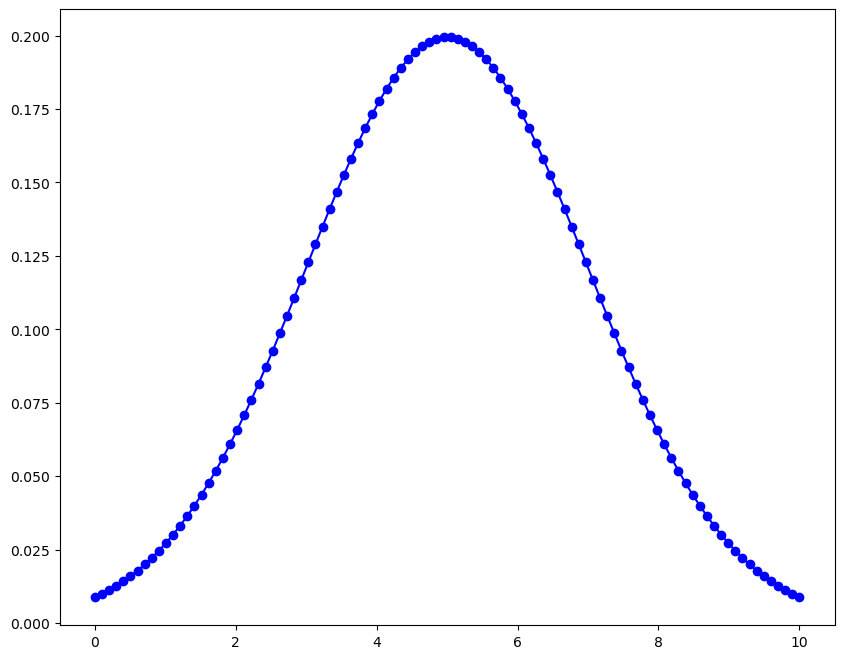

In [8]:
# Seed
onp.random.seed(42)

# Parameter
mu = 5
sigma = 2

# Normal distribution
x = onp.linspace(0,10,num=100)
pd_norm = stats.norm.pdf(x, loc = mu, scale=sigma)

# Postprocessing
plt.figure(figsize=(10,8))
plt.plot(x, pd_norm, c='b')
plt.scatter(x, pd_norm, c='b')

The **cumulative distribution function (CDF)** is defined as:
$$
F(x) = P(X\leq x) = \int_{-\infty}^xf(t)dt
$$

In [9]:
stats.norm.cdf(mu, loc = mu, scale=sigma)

0.5

The **Probability Point Function (PPF)** is the inverse of the CDF: Given $p$, find $x$ such that
$$
P(X\leq x) = p
$$

In [10]:
stats.norm.ppf(0.5, loc=mu, scale=sigma)

5.0

## Maximum Likelihood Estimation of the Guassian mean

Assume observations $X_1, X_2, \ldots, X_n$ are drawn i.i.d. from $\mathcal{N}(\mu, \sigma^2)$, where $\mu$ is unknown and $\sigma^2$ is known. The goal is to find an estimate of $\mu$ based on the observations $X_1, X_2, \ldots, X_n$. 


The MLE of $\mu$ is the sample mean.


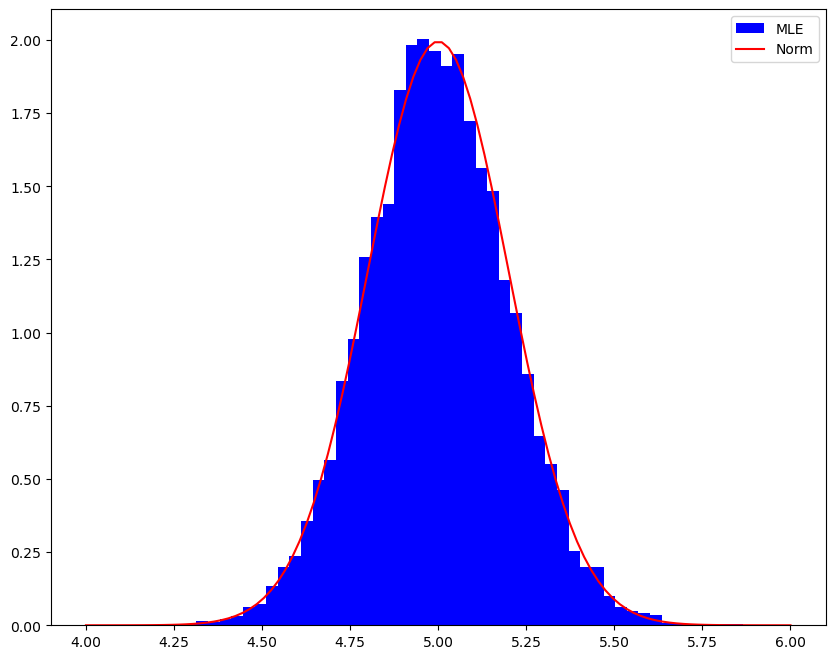

In [11]:
# Seed
onp.random.seed(42)

# Monte Carlo Sampling
size = 100
num_exp = 10000

data= []
mu_est = []
for _ in range(num_exp):
    rand_data = stats.norm.rvs(loc=mu, scale=sigma, size=size)
    # rand_data = onp.random.normal(loc=mu_true, scale=sigma,size=size)
    data.append(rand_data)
    mu_est.append(onp.mean(rand_data))

x = onp.linspace(mu-1, mu+1, num=100)
pd_norm = stats.norm.pdf(x, loc=mu, scale=sigma/onp.sqrt(size))

# postprocessing
plt.figure(figsize=(10,8))
plt.hist(mu_est, bins=50, density=True, color='b', label = "MLE")
plt.plot(x, pd_norm, c='r', label = "Norm")
plt.legend()